In [3]:
import pandas as pd
dataset=pd.read_csv('/content/Predict Hair Fall.csv')
dataset.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        999 non-null    int64 
 1   Genetics                  999 non-null    object
 2   Hormonal Changes          999 non-null    object
 3   Medical Conditions        999 non-null    object
 4   Medications & Treatments  999 non-null    object
 5   Nutritional Deficiencies  999 non-null    object
 6   Stress                    999 non-null    object
 7   Age                       999 non-null    int64 
 8   Poor Hair Care Habits     999 non-null    object
 9   Environmental Factors     999 non-null    object
 10  Smoking                   999 non-null    object
 11  Weight Loss               999 non-null    object
 12  Hair Loss                 999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [5]:
print(dataset.columns.tolist())


['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age', 'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss', 'Hair Loss']


In [6]:
dataset.columns = dataset.columns.str.strip()


In [8]:
import numpy as np

# Replace 'No Data' with NaN
dataset = dataset.replace('No Data', np.nan)

# Drop rows with any NaN values
dataset = dataset.dropna()

display(dataset.head())

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1


In [9]:
from sklearn.preprocessing import LabelEncoder
for col in ['Genetics','Hormonal Changes','Medical Conditions','Medications & Treatments','Nutritional Deficiencies','Stress','Poor Hair Care Habits','Environmental Factors','Smoking','Weight Loss']:
    le = LabelEncoder()
    dataset[col]=le.fit_transform(dataset[col])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 1 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        809 non-null    int64
 1   Genetics                  809 non-null    int64
 2   Hormonal Changes          809 non-null    int64
 3   Medical Conditions        809 non-null    int64
 4   Medications & Treatments  809 non-null    int64
 5   Nutritional Deficiencies  809 non-null    int64
 6   Stress                    809 non-null    int64
 7   Age                       809 non-null    int64
 8   Poor Hair Care Habits     809 non-null    int64
 9   Environmental Factors     809 non-null    int64
 10  Smoking                   809 non-null    int64
 11  Weight Loss               809 non-null    int64
 12  Hair Loss                 809 non-null    int64
dtypes: int64(13)
memory usage: 88.5 KB


In [11]:
x=dataset.drop(columns=['Hair Loss'])
y=dataset['Hair Loss']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [LogisticRegression(), SVC(), KNeighborsClassifier(), GaussianNB()]

errors = {}

for model in models:
    model.fit(x_train,y_train)
    name = type(model).__name__
    score = model.score(x_test,y_test)*100
    errors[name] = {'score': score} # Store score in a dictionary
    if name in ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GaussianNB']:
      y_pred = model.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred) * 100
      errors[name]['accuracy'] = accuracy # Add accuracy for classification models

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
display(errors)

{'LogisticRegression': {'score': 51.23456790123457,
  'accuracy': 51.23456790123457},
 'SVC': {'score': 54.32098765432099, 'accuracy': 54.32098765432099},
 'KNeighborsClassifier': {'score': 51.23456790123457,
  'accuracy': 51.23456790123457},
 'GaussianNB': {'score': 53.086419753086425, 'accuracy': 53.086419753086425}}

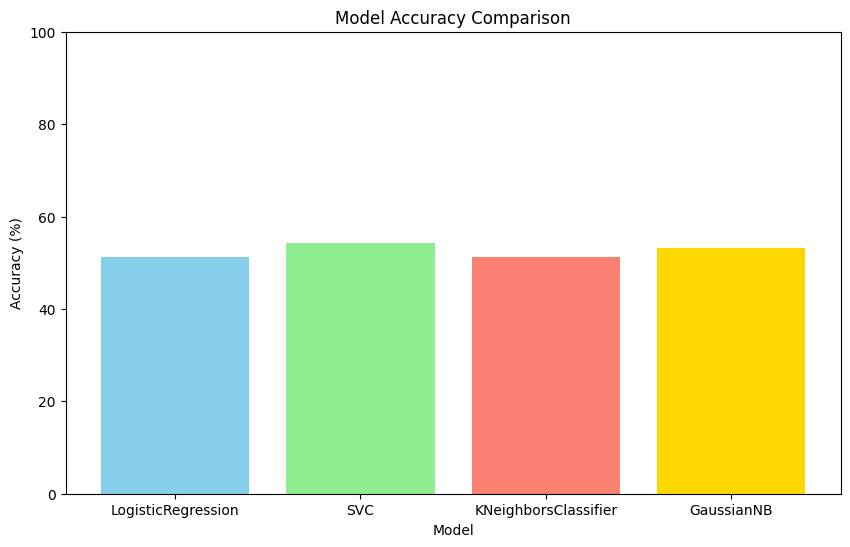

In [14]:
import matplotlib.pyplot as plt

# Extract model names and accuracies for classification models
model_names = [name for name, metrics in errors.items() if 'accuracy' in metrics]
accuracies = [metrics['accuracy'] for name, metrics in errors.items() if 'accuracy' in metrics]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.show()